<a href="https://colab.research.google.com/github/JunyingLLL/DataRes-Hackathon-Project/blob/main/DataLearn_Mini_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('breast-cancer.csv') # read in csv file and assign to variable with name 'df'
df.head() # make sure data was read in correctly

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# check for null values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# clean the data
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1}) # convert 'M' to 1 and 'B' to 0 in 'diagnosis' column
df = df.drop('id', axis=1) # delete id column (does not correlate with malignant or benign cancer)
df.head() # check that changes were incorporated

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


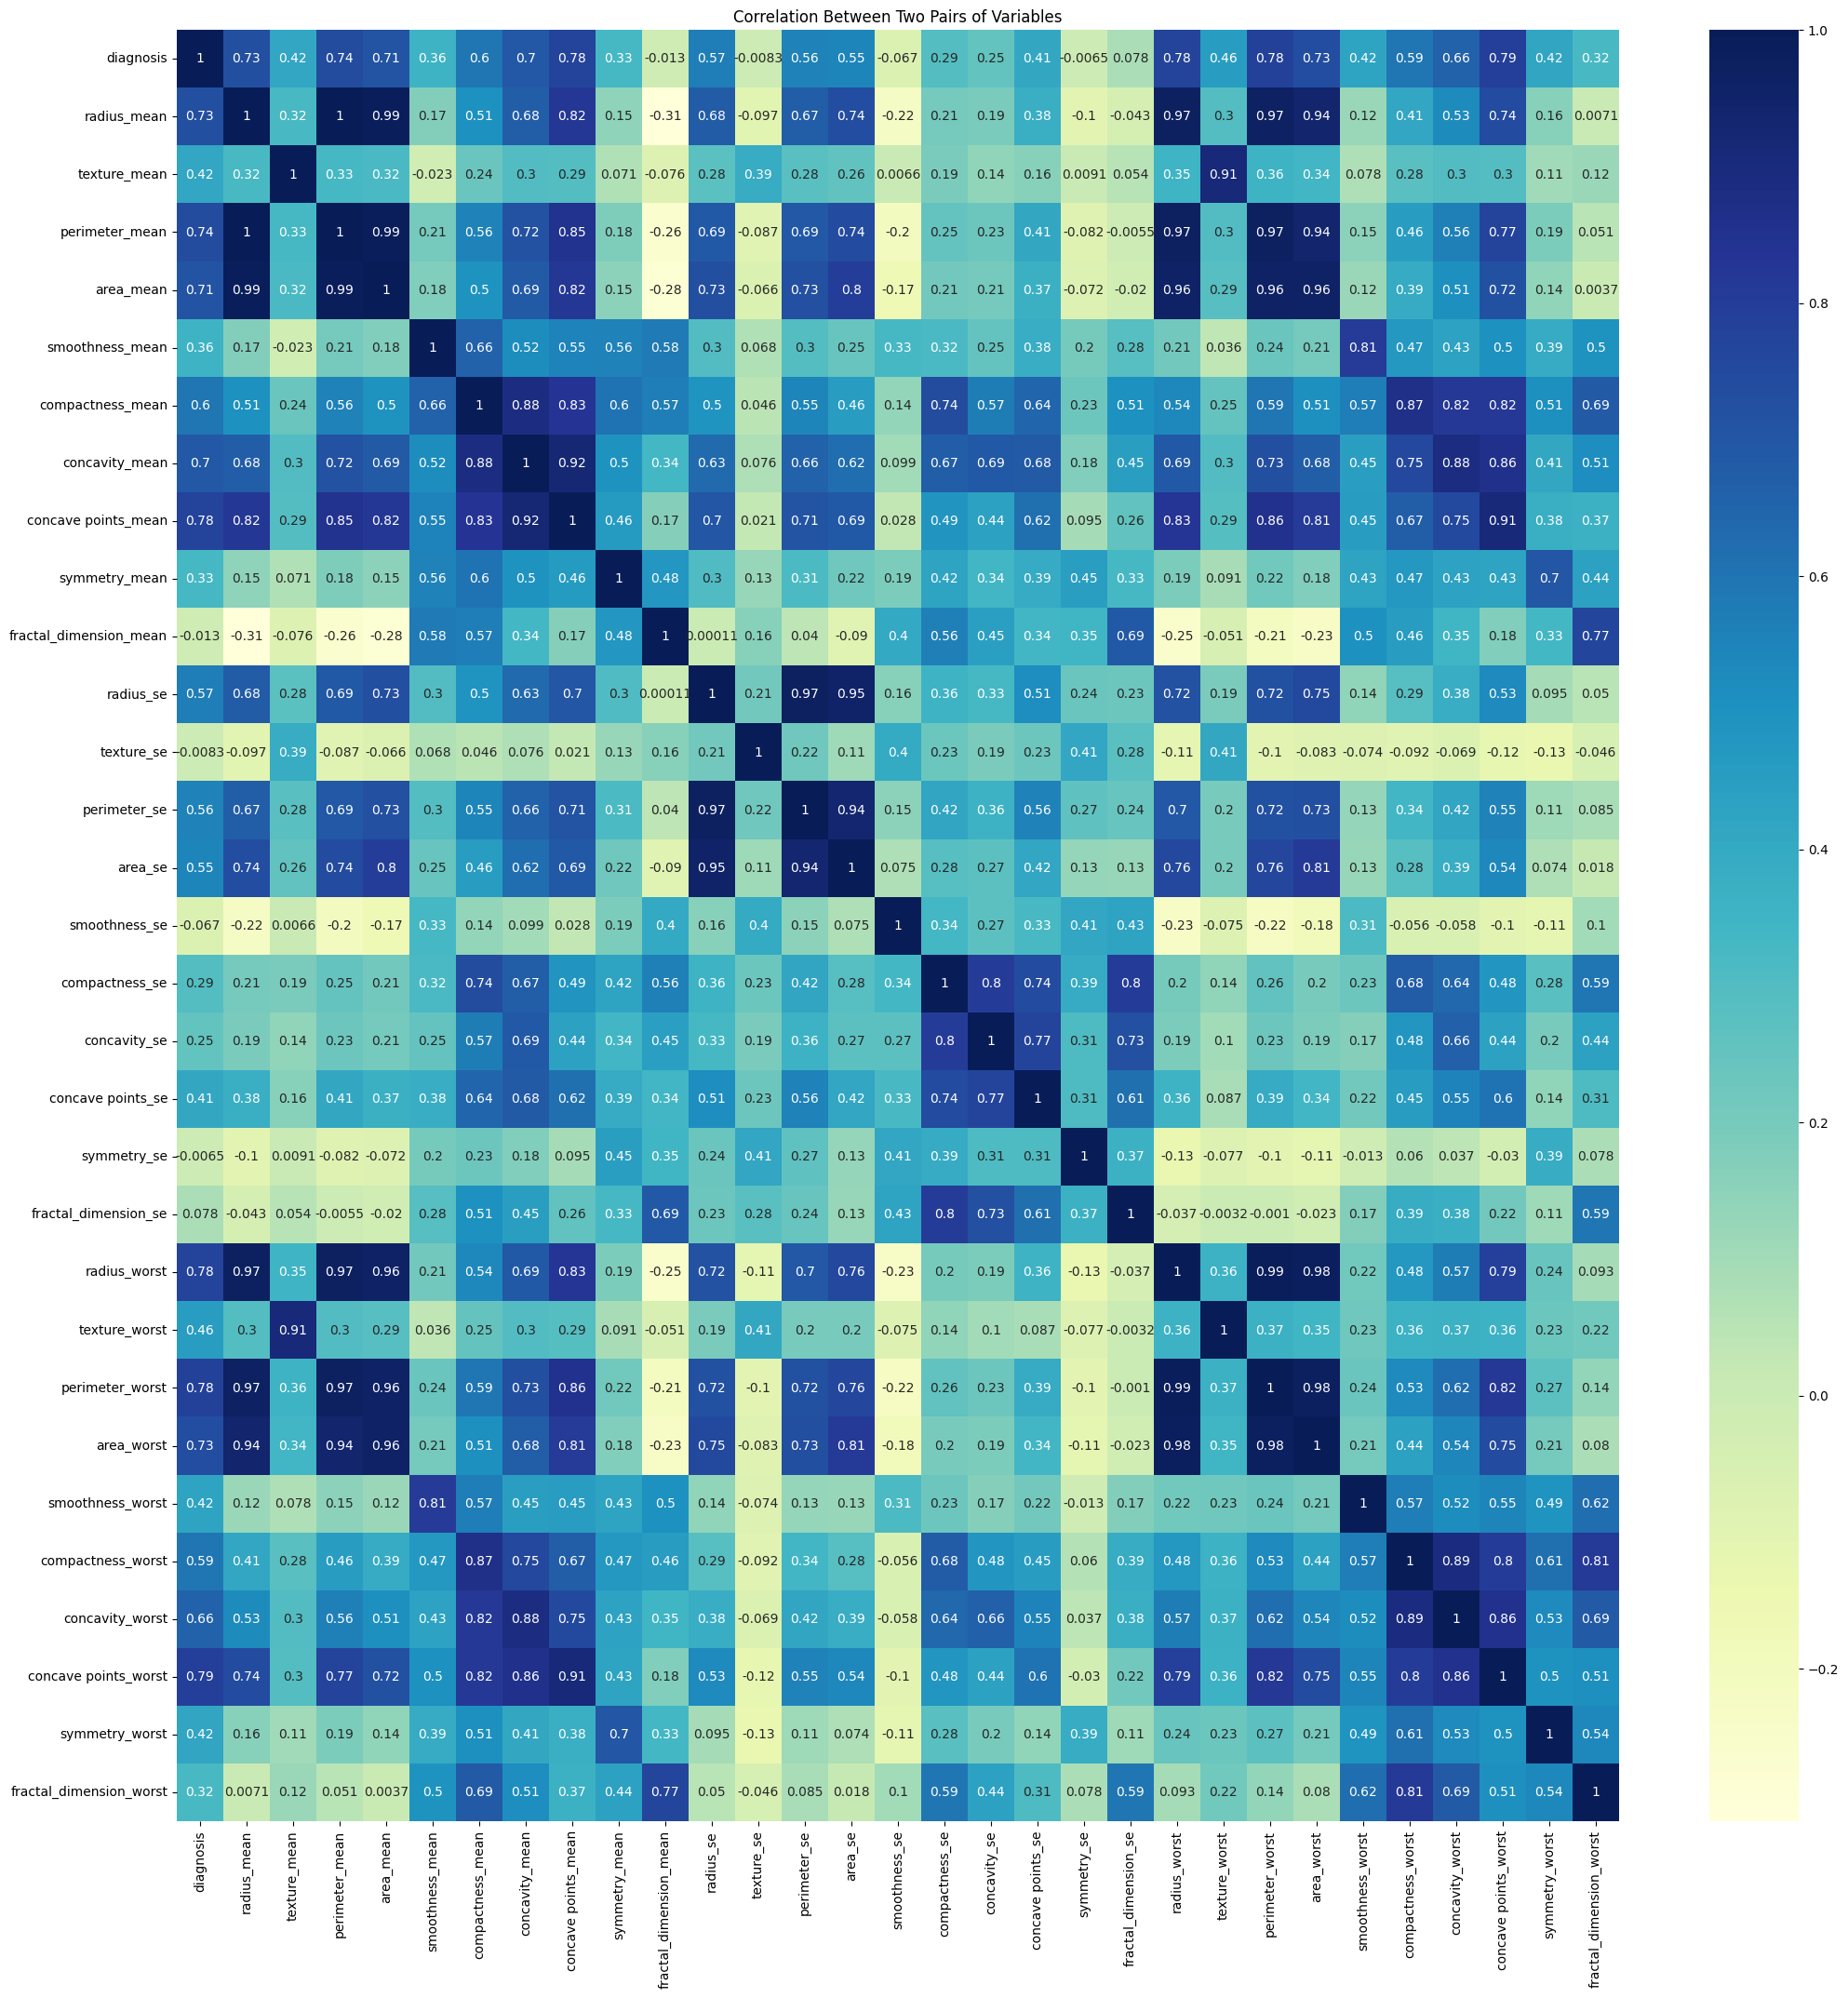

In [ ]:
# create a heatmap to visualize a correlation or concentration matrix, represented as colors, between each column of df
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Between Two Pairs of Variables")
plt.show()

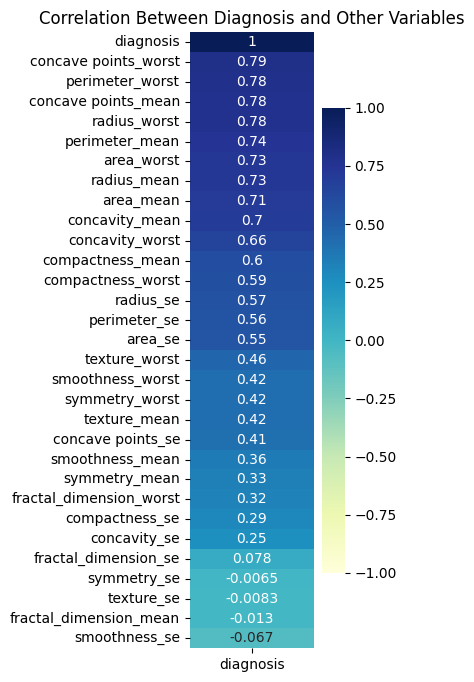

In [ ]:
# create a heatmap to visualize the correlation between diagnosis and other variables
plt.figure(figsize=(2,8))
sns.heatmap(df.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
plt.title("Correlation Between Diagnosis and Other Variables")
plt.show()

In [ ]:
# count the number of benign and malignant cases
height = df['diagnosis'].value_counts()

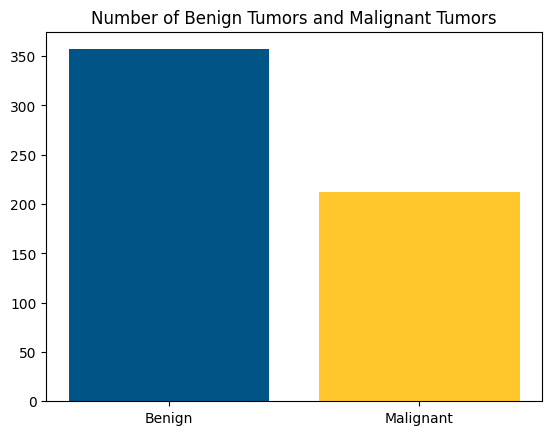

In [ ]:
# create a barplot of the frequencies of benign and malignant tumors
color = ['#005587', '#FFC72C']
diagnosis = ["Benign","Malignant"]
fig, ax = plt.subplots()
barplot=ax.bar(diagnosis, height, color = color)
plt.title("Number of Benign Tumors and Malignant Tumors")
plt.show()

From the heatmap titled "Correlation Between Diagnosis and Other Variables", we chose to provide the summary statistics and create visualizations for variables with r > 0.7. The results are as follows:

## Area_mean

In [ ]:
# classify area_mean according to tumor type
area_meanB = df.loc[df['diagnosis'] == 0, 'area_mean']
area_meanM = df.loc[df['diagnosis'] == 1, 'area_mean']

In [ ]:
# obtain summary statistics for area_mean
print(area_meanM.describe()) # summary statistics for malignant tumors
print()
print(area_meanB.describe()) # summary statistics for benign tumors

count     212.000000
mean      978.376415
std       367.937978
min       361.600000
25%       705.300000
50%       932.000000
75%      1203.750000
max      2501.000000
Name: area_mean, dtype: float64

count    357.000000
mean     462.790196
std      134.287118
min      143.500000
25%      378.200000
50%      458.400000
75%      551.100000
max      992.100000
Name: area_mean, dtype: float64


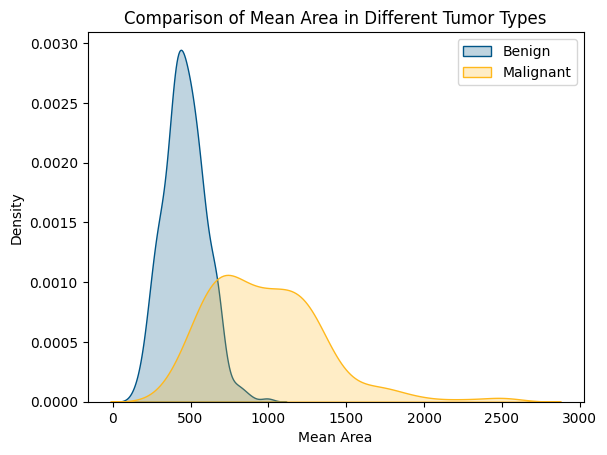

In [ ]:
# create a kde plot for area_mean
fig = sns.kdeplot(area_meanB, fill=True, color='#005587')
fig = sns.kdeplot(area_meanM, fill=True, color='#FFB81C')
plt.xlabel('Mean Area')
plt.legend(labels=['Benign','Malignant'])
fig.set(title='Comparison of Mean Area in Different Tumor Types')
plt.show()

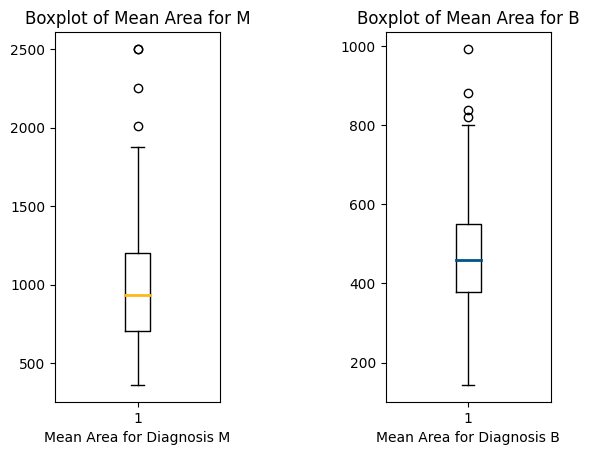

In [ ]:
# create a boxplot for area_mean
plt.subplot(1, 2, 1)
plt.boxplot(area_meanM,
           medianprops = dict(color = '#FFB81C', linewidth = 2))
plt.title('Boxplot of Mean Area for M')
plt.xlabel('Mean Area for Diagnosis M')

plt.subplot(1, 2, 2)
plt.boxplot(area_meanB,
           medianprops = dict(color = '#005587', linewidth = 2))
plt.title('Boxplot of Mean Area for B')
plt.xlabel('Mean Area for Diagnosis B')

plt.subplots_adjust(wspace=1)

## Concave points_mean

In [ ]:
# classify concave points_mean according to tumor type
concave_points_meanB = df.loc[df['diagnosis'] == 0, 'concave points_mean']
concave_points_meanM = df.loc[df['diagnosis'] == 1, 'concave points_mean']

In [ ]:
# obtain summary statistics for concave points_mean
print(concave_points_meanM.describe()) # summary statistics for malignant tumors
print()
print(concave_points_meanB.describe()) # summary statistics for benign tumors

count    212.000000
mean       0.087990
std        0.034374
min        0.020310
25%        0.064620
50%        0.086280
75%        0.103175
max        0.201200
Name: concave points_mean, dtype: float64

count    357.000000
mean       0.025717
std        0.015909
min        0.000000
25%        0.015020
50%        0.023440
75%        0.032510
max        0.085340
Name: concave points_mean, dtype: float64


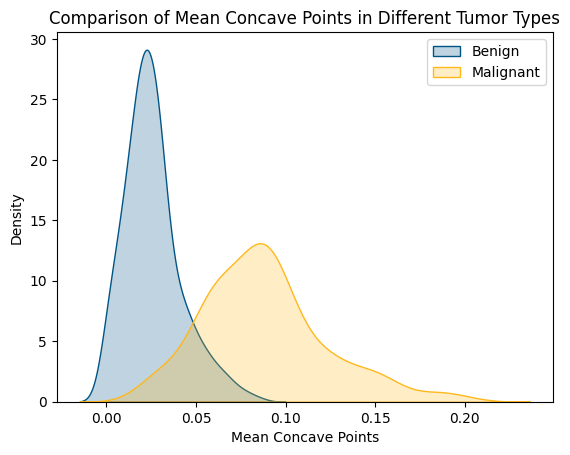

In [ ]:
# create a kde plot for concave points_mean
fig = sns.kdeplot(concave_points_meanB, fill=True, color='#005587')
fig = sns.kdeplot(concave_points_meanM, fill=True, color='#FFB81C')
plt.xlabel('Mean Concave Points')
plt.legend(labels=['Benign','Malignant'])
fig.set(title='Comparison of Mean Concave Points in Different Tumor Types')
plt.show()

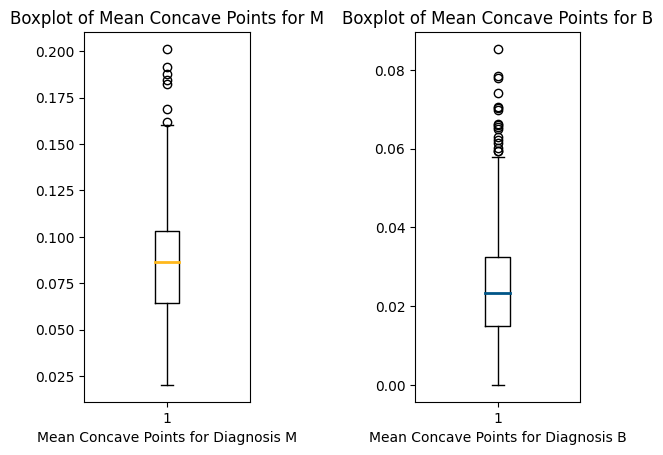

In [ ]:
# create a boxplot for concave points_mean
plt.subplot(1, 2, 1)
plt.boxplot(concave_points_meanM,
           medianprops = dict(color = '#FFB81C', linewidth = 2))
plt.title('Boxplot of Mean Concave Points for M')
plt.xlabel('Mean Concave Points for Diagnosis M')

plt.subplot(1, 2, 2)
plt.boxplot(concave_points_meanB,
           medianprops = dict(color = '#005587', linewidth = 2))
plt.title('Boxplot of Mean Concave Points for B')
plt.xlabel('Mean Concave Points for Diagnosis B')

plt.subplots_adjust(wspace=1)

## Radius_worst

In [ ]:
# classify radius_worst according to tumor type
radius_worstB = df.loc[df['diagnosis'] == 0, 'radius_worst']
radius_worstM = df.loc[df['diagnosis'] == 1, 'radius_worst']

In [ ]:
# obtain summary statistics for radius_worst
print(radius_worstM.describe()) # summary statistics for malignant tumors
print()
print(radius_worstB.describe()) # summary statistics for benign tumors

count    212.000000
mean      21.134811
std        4.283569
min       12.840000
25%       17.730000
50%       20.590000
75%       23.807500
max       36.040000
Name: radius_worst, dtype: float64

count    357.000000
mean      13.379801
std        1.981368
min        7.930000
25%       12.080000
50%       13.350000
75%       14.800000
max       19.820000
Name: radius_worst, dtype: float64


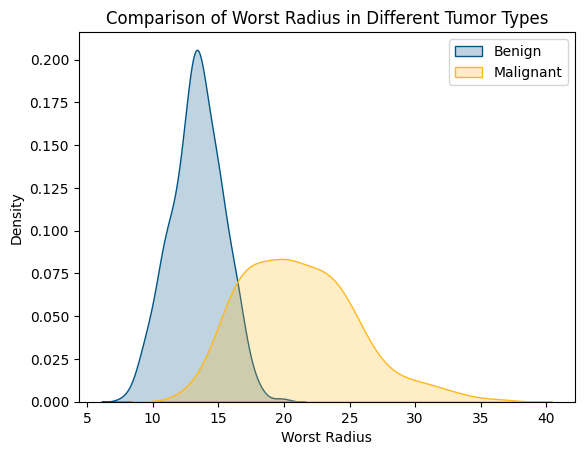

In [ ]:
# create a kde plot for radius_worst
fig = sns.kdeplot(radius_worstB, fill=True, color='#005587')
fig = sns.kdeplot(radius_worstM, fill=True, color='#FFB81C')
plt.xlabel('Worst Radius')
plt.legend(labels=['Benign','Malignant'])
fig.set(title='Comparison of Worst Radius in Different Tumor Types')
plt.show()

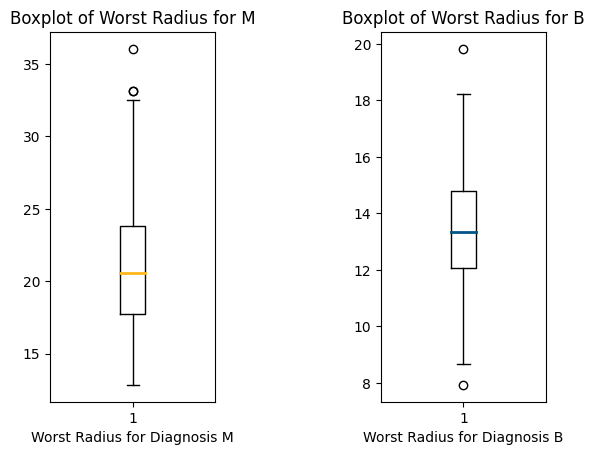

In [ ]:
# create a boxplot for radius_worst
plt.subplot(1, 2, 1)
plt.boxplot(radius_worstM,
           medianprops = dict(color = '#FFB81C', linewidth = 2))
plt.title('Boxplot of Worst Radius for M')
plt.xlabel('Worst Radius for Diagnosis M')

plt.subplot(1, 2, 2)
plt.boxplot(radius_worstB,
           medianprops = dict(color = '#005587', linewidth = 2))
plt.title('Boxplot of Worst Radius for B')
plt.xlabel('Worst Radius for Diagnosis B')

plt.subplots_adjust(wspace=1)

## Area_worst

In [ ]:
# classify area_worst according to tumor type
area_worstB = df.loc[df['diagnosis'] == 0, 'area_worst']
area_worstM = df.loc[df['diagnosis'] == 1, 'area_worst']

In [ ]:
# obtain summary statistics for area_worst
print(area_worstM.describe()) # summary statistics for malignant tumors
print()
print(area_worstB.describe()) # summary statistics for benign tumors

count     212.000000
mean     1422.286321
std       597.967743
min       508.100000
25%       970.300000
50%      1303.000000
75%      1712.750000
max      4254.000000
Name: area_worst, dtype: float64

count     357.000000
mean      558.899440
std       163.601424
min       185.200000
25%       447.100000
50%       547.400000
75%       670.000000
max      1210.000000
Name: area_worst, dtype: float64


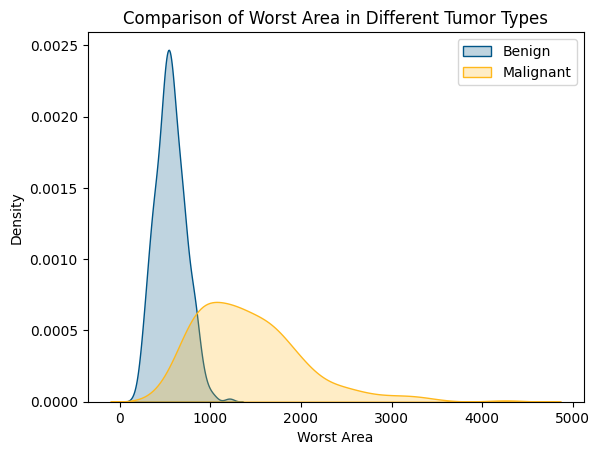

In [ ]:
# create a kde plot for area_worst
fig = sns.kdeplot(area_worstB, fill=True, color='#005587')
fig = sns.kdeplot(area_worstM, fill=True, color='#FFB81C')
plt.xlabel('Worst Area')
plt.legend(labels=['Benign','Malignant'])
fig.set(title='Comparison of Worst Area in Different Tumor Types')
plt.show()

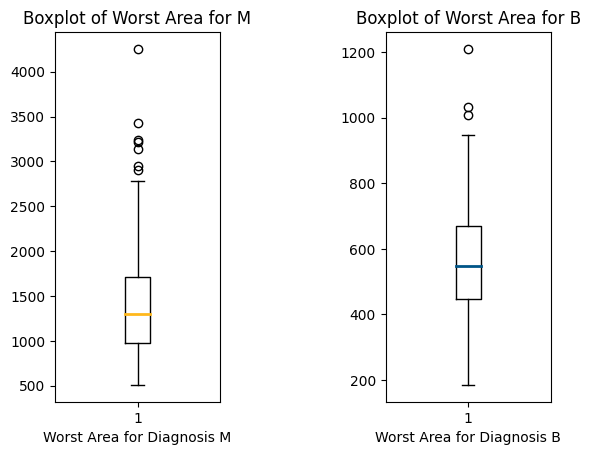

In [ ]:
# create a boxplot for area_worst
plt.subplot(1, 2, 1)
plt.boxplot(area_worstM,
           medianprops = dict(color = '#FFB81C', linewidth = 2))
plt.title('Boxplot of Worst Area for M')
plt.xlabel('Worst Area for Diagnosis M')

plt.subplot(1, 2, 2)
plt.boxplot(area_worstB,
           medianprops = dict(color = '#005587', linewidth = 2))
plt.title('Boxplot of Worst Area for B')
plt.xlabel('Worst Area for Diagnosis B')

plt.subplots_adjust(wspace=1)

## Concave points_worst


In [ ]:
# classify concave points_worst according to tumor type
concave_points_worstB = df.loc[df['diagnosis'] == 0, 'concave points_worst']
concave_points_worstM = df.loc[df['diagnosis'] == 1, 'concave points_worst']

In [ ]:
# obtain summary statistics for concave points_worst
print(concave_points_worstM.describe()) # summary statistics for malignant tumors
print()
print(concave_points_worstB.describe()) # summary statistics for benign tumors

count    212.000000
mean       0.182237
std        0.046308
min        0.028990
25%        0.152750
50%        0.182000
75%        0.210675
max        0.291000
Name: concave points_worst, dtype: float64

count    357.000000
mean       0.074444
std        0.035797
min        0.000000
25%        0.051040
50%        0.074310
75%        0.097490
max        0.175000
Name: concave points_worst, dtype: float64


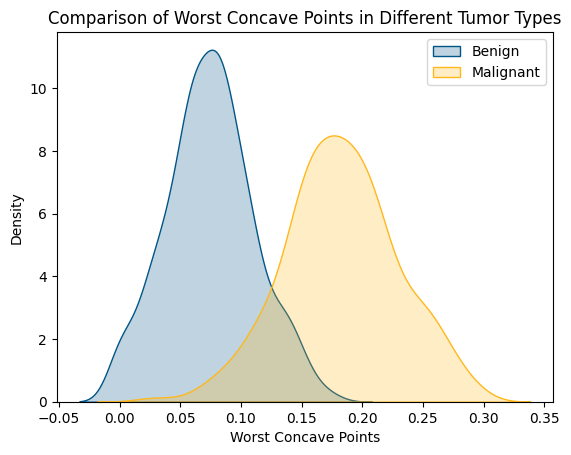

In [ ]:
# create a kde plot for concave points_worst
fig = sns.kdeplot(concave_points_worstB, fill=True, color='#005587')
fig = sns.kdeplot(concave_points_worstM, fill=True, color='#FFB81C')
plt.xlabel('Worst Concave Points')
plt.legend(labels=['Benign','Malignant'])
fig.set(title='Comparison of Worst Concave Points in Different Tumor Types')
plt.show()

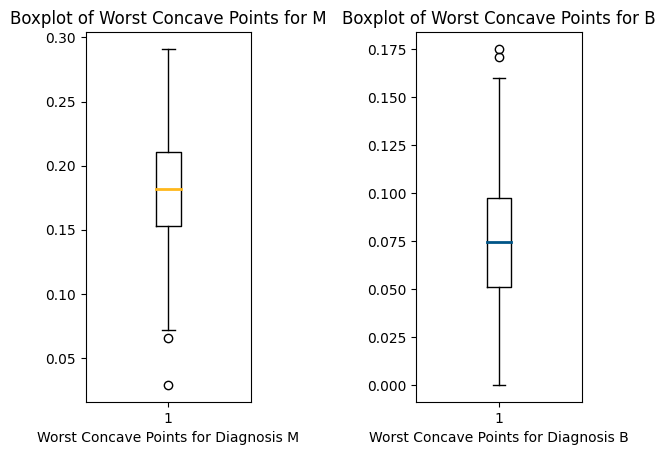

In [ ]:
# create a boxplot for concave points_worst
plt.subplot(1, 2, 1)
plt.boxplot(concave_points_worstM,
           medianprops = dict(color = '#FFB81C', linewidth = 2))
plt.title('Boxplot of Worst Concave Points for M')
plt.xlabel('Worst Concave Points for Diagnosis M')

plt.subplot(1, 2, 2)
plt.boxplot(concave_points_worstB,
           medianprops = dict(color = '#005587', linewidth = 2))
plt.title('Boxplot of Worst Concave Points for B')
plt.xlabel('Worst Concave Points for Diagnosis B')

plt.subplots_adjust(wspace=1)

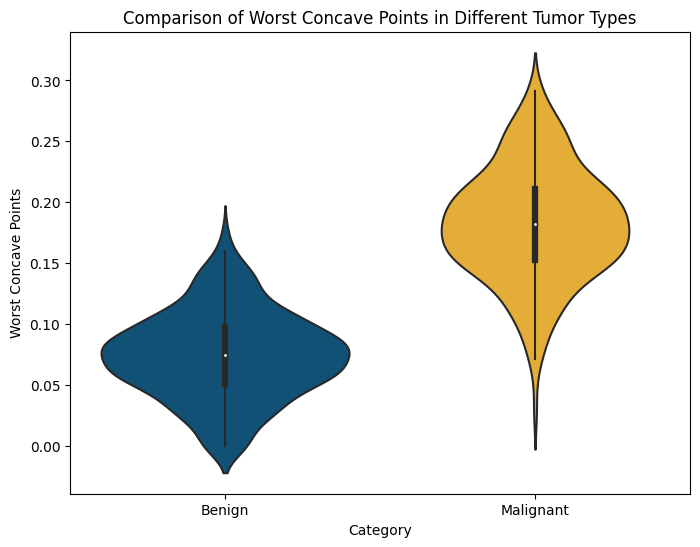

In [ ]:
# create a violin plot for concave_points_worst
plt.figure(figsize=(8, 6))
v=sns.violinplot(x='diagnosis', y='concave points_worst', data=df, palette = (['#005587','#FFB81C']))
v.set_xticklabels(['Benign', 'Malignant'])
plt.xlabel('Category')
plt.ylabel('Worst Concave Points')
v.set(title='Comparison of Worst Concave Points in Different Tumor Types')
plt.show()

## Radius_mean

In [ ]:
# classify radius_mean according to tumor type
radius_meanB = df.loc[df['diagnosis'] == 0, 'radius_mean']
radius_meanM = df.loc[df['diagnosis'] == 1, 'radius_mean']

In [ ]:
# obtain summary statistics for radius_mean
print(radius_meanM.describe())  # summary statistics for malignant tumors
print()
print(radius_meanB.describe()) # summary statistics for benign tumors

count    212.000000
mean      17.462830
std        3.203971
min       10.950000
25%       15.075000
50%       17.325000
75%       19.590000
max       28.110000
Name: radius_mean, dtype: float64

count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


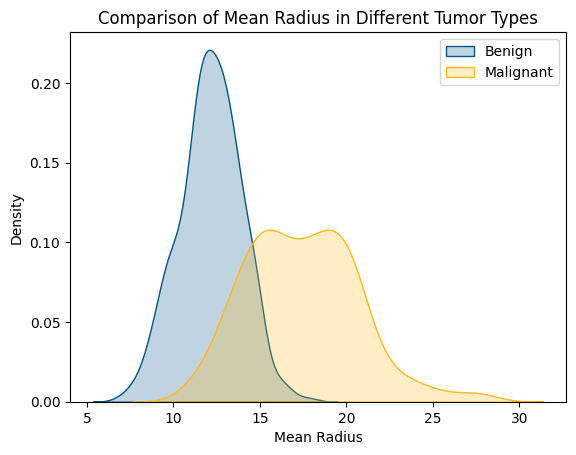

In [ ]:
# create a kde plot for radius_mean
fig = sns.kdeplot(radius_meanB, fill=True, color='#005587')
fig = sns.kdeplot(radius_meanM, fill=True, color='#FFB81C')
plt.xlabel('Mean Radius')
plt.legend(labels=['Benign','Malignant'])
fig.set(title='Comparison of Mean Radius in Different Tumor Types')
plt.show()

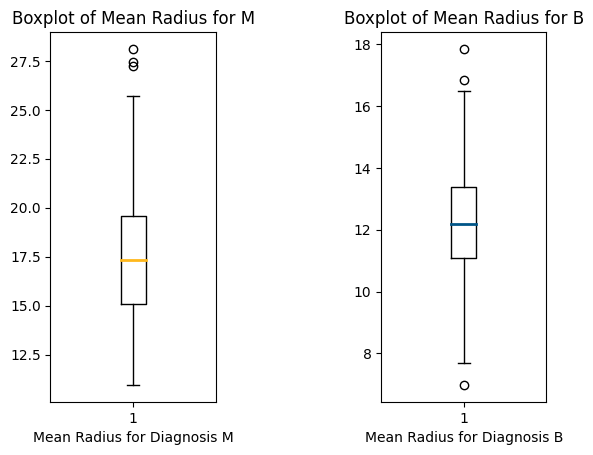

In [ ]:
# create a boxplot for radius_mean
plt.subplot(1, 2, 1)
plt.boxplot(radius_meanM,
           medianprops = dict(color = '#FFB81C', linewidth = 2))
plt.title('Boxplot of Mean Radius for M')
plt.xlabel('Mean Radius for Diagnosis M')

plt.subplot(1, 2, 2)
plt.boxplot(radius_meanB,
           medianprops = dict(color = '#005587', linewidth = 2))
plt.title('Boxplot of Mean Radius for B')
plt.xlabel('Mean Radius for Diagnosis B')

plt.subplots_adjust(wspace=1)

## Perimeter_worst

In [ ]:
# classify perimeter_worst according to tumor type
perimeter_worstB = df.loc[df['diagnosis'] == 0, 'perimeter_worst']
perimeter_worstM = df.loc[df['diagnosis'] == 1, 'perimeter_worst']

In [ ]:
# obtain summary statistics for perimeter_worst
print(perimeter_worstM.describe())  # summary statistics for malignant tumors
print()
print(perimeter_worstB.describe()) # summary statistics for benign tumors

count    212.000000
mean     141.370330
std       29.457055
min       85.100000
25%      119.325000
50%      138.000000
75%      159.800000
max      251.200000
Name: perimeter_worst, dtype: float64

count    357.000000
mean      87.005938
std       13.527091
min       50.410000
25%       78.270000
50%       86.920000
75%       96.590000
max      127.100000
Name: perimeter_worst, dtype: float64


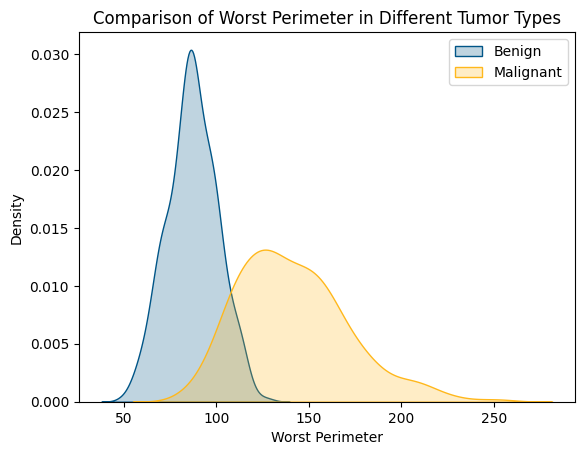

In [ ]:
# create a kde plot for perimeter_worst
fig = sns.kdeplot(perimeter_worstB, fill=True, color='#005587')
fig = sns.kdeplot(perimeter_worstM, fill=True, color='#FFB81C')
plt.xlabel('Worst Perimeter')
plt.legend(labels=['Benign','Malignant'])
fig.set(title='Comparison of Worst Perimeter in Different Tumor Types')
plt.show()

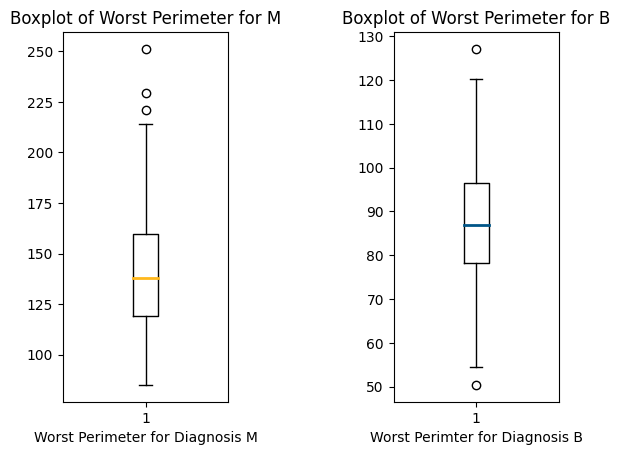

In [ ]:
# create a boxplot for perimeter_worst
plt.subplot(1, 2, 1)
plt.boxplot(perimeter_worstM,
           medianprops = dict(color = '#FFB81C', linewidth = 2))
plt.title('Boxplot of Worst Perimeter for M')
plt.xlabel('Worst Perimeter for Diagnosis M')

plt.subplot(1, 2, 2)
plt.boxplot(perimeter_worstB,
           medianprops = dict(color = '#005587', linewidth = 2))
plt.title('Boxplot of Worst Perimeter for B')
plt.xlabel('Worst Perimter for Diagnosis B')

plt.subplots_adjust(wspace=1)

## Perimeter_mean

In [ ]:
# classify perimeter_mean according to tumor type
perimeter_meanB = df.loc[df['diagnosis'] == 0, 'perimeter_mean']
perimeter_meanM = df.loc[df['diagnosis'] == 1, 'perimeter_mean']

In [ ]:
# obtain summary statistics for perimeter_mean
print(perimeter_meanM.describe())  # summary statistics for malignant tumors
print()
print(perimeter_meanB.describe()) # summary statistics for benign tumors

count    212.000000
mean     115.365377
std       21.854653
min       71.900000
25%       98.745000
50%      114.200000
75%      129.925000
max      188.500000
Name: perimeter_mean, dtype: float64

count    357.000000
mean      78.075406
std       11.807438
min       43.790000
25%       70.870000
50%       78.180000
75%       86.100000
max      114.600000
Name: perimeter_mean, dtype: float64


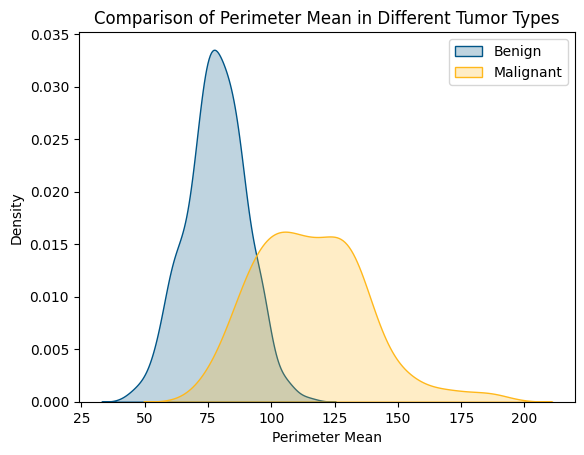

In [ ]:
# create a kde plot for perimeter_mean
fig = sns.kdeplot(perimeter_meanB, fill=True, color='#005587')
fig = sns.kdeplot(perimeter_meanM, fill=True, color='#FFB81C')
plt.xlabel('Perimeter Mean')
plt.legend(labels=['Benign', 'Malignant'])
fig.set(title='Comparison of Perimeter Mean in Different Tumor Types')
plt.show()


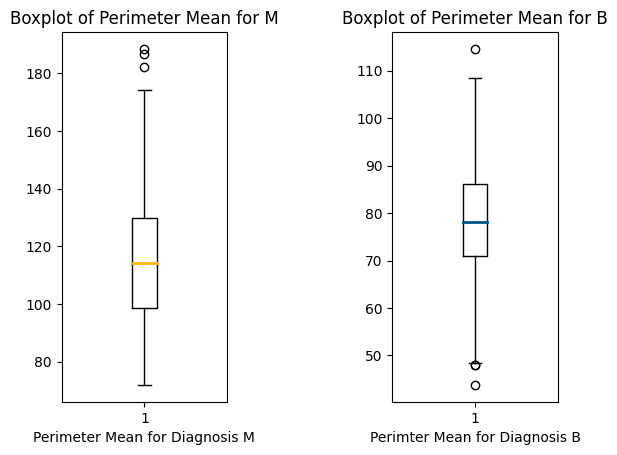

In [ ]:
# create a boxplot for perimeter_mean
plt.subplot(1, 2, 1)
plt.boxplot(perimeter_meanM,
           medianprops = dict(color = '#FFB81C', linewidth = 2))
plt.title('Boxplot of Perimeter Mean for M')
plt.xlabel('Perimeter Mean for Diagnosis M')

plt.subplot(1, 2, 2)
plt.boxplot(perimeter_meanB,
           medianprops = dict(color = '#005587', linewidth = 2))
plt.title('Boxplot of Perimeter Mean for B')
plt.xlabel('Perimter Mean for Diagnosis B')

plt.subplots_adjust(wspace=1)

# Machine Learning Model

In [ ]:
# Steps:

# Use machine learning model

# Clean dataset: drop correlation predictor variables r <= 0.7

# Split data into train and test (80/20)

# Use linear regression and logistic regression to classify tumors as malignant or benign

# Evaluate efficiency

In [ ]:
# subset the variables with correlation r > 0.7
df_ML = df.loc[:, ['diagnosis', 'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst' ,'radius_mean', 'area_mean']]

# shuffle rows in df_ML in a random order
df_shuffled = df_ML.sample(frac = 1)
print(df_shuffled.head())

# split data into 80% training and 20% testing
ratio = 0.8
train_rows = int(df_shuffled.shape[0]*ratio)

# split data into independent (X) and dependent (Y)
X_train = df_shuffled.iloc[:train_rows, 1:9].values
Y_train = df_shuffled.iloc[:train_rows, 0].values
X_test = df_shuffled.iloc[train_rows:, 1:9].values
Y_test = df_shuffled.iloc[train_rows:, 0].values

     diagnosis  concave points_worst  perimeter_worst  concave points_mean  \
197          1               0.09181           129.10             0.057780   
65           1               0.16140           114.60             0.090290   
425          0               0.02579            69.92             0.005159   
437          0               0.07453           101.20             0.029440   
28           1               0.20240           149.30             0.087510   

     radius_worst  perimeter_mean  area_worst  radius_mean  area_mean  
197         19.76          117.40      1228.0        18.08     1024.0  
65          17.31           97.40       925.1        14.78      668.3  
425         11.11           63.19       376.3        10.03      307.3  
437         15.66           89.78       750.0        14.04      611.2  
28          20.27          102.40      1269.0        15.30      732.4  


In [ ]:
# scaling the data:
# create a function that standardizes the values
def standardize(values):
  z_values = (values - np.mean(values)) / np.std(values)
  standardized_values = 1 / (1 + np.exp(-1 * z_values))
  return standardized_values

In [ ]:
# create a loop to standardize each column
for i in range(0,8):
  X_train[:,i] = standardize(X_train[:,i])
  X_test[:,i] = standardize(X_test[:,i])

In [ ]:
# create logistic model
logistic_model = LogisticRegression(random_state = 0)
logistic_model.fit(X_train, Y_train)

# print the model's training accuracy
print('Logistic regression training accuracy:', logistic_model.score(X_train,Y_train))

Logistic regression training accuracy: 0.9428571428571428


In [ ]:
# describe performance of classification model using confusion matrix
logistic_cm = confusion_matrix(Y_test, logistic_model.predict(X_test))

# print the confusion matrix
print(logistic_cm)
print()

# print model accuracy on test data
logistic_test_accuracy = (logistic_cm[0][0] + logistic_cm[1][1])/ logistic_cm.sum()
print('Logistic regression testing accuracy:', logistic_test_accuracy)

[[70  2]
 [ 3 39]]

Logistic regression testing accuracy: 0.956140350877193


In [ ]:
# create linear model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# print the model's training accuracy
print('Linear regression training accuracy:', linear_model.score(X_train,Y_train))

Linear regression training accuracy: 0.7712866161706053


In [ ]:
# this does not work as sklearn does not allow linear regression models to predict binary output with continuous input

# describe performance of classification model using confusion matrix
# linear_cm = confusion_matrix(Y_test, linear_model.predict(X_test))

# print the confusion matrix
# print(linear_cm)
# print()

# print model accuracy on test data
# linear_test_accuracy = (linear_cm[0][0] + linear_cm[1][1])/ linear_cm.sum()
# print(linear_test_accuracy)

**Overview:**
From Kaggle, we examined breast cancer data for tumors and created a machine learning model that aims to predict whether patients have a malignant (cancerous) or benign (non-cancerous) tumor. From 30 independent variables measured for each tumor, we used a heatmap to identify variables that had a strong correlation with the diagnosis of the tumor. In the end, we took variables with a correlation coefficient of absolute value greater than 0.7. This included 'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', and 'area_mean'.

**Data Visualization:**
Plotting the distribution of these impactful variables revealed that values fell into two normal distributions, one about the malignant mean value and one about the benign mean value. These normalized distriubtions often had a lot of overlap, but with taking multiple independent variables into consideration, we hypothesized that we can create a model that accurately predicts the diagnosis of the tumors.

**Machine Learning:**
We tried 2 different models, one logistic and one linear, and trained both models on a randomized 80% of the data set. The logarithmic model consistenly has a training accuracy of around 93%, while the linear model consistenly has a training accuracy of around 77%.

When testing the two models on the rest of the 20% of the data, the logarithmic model consistently scored an accuracy of around 93% again, while the linear model was unable to be tested. This is because linear regression does not make much sense for classifcation, like in this case. Instead, linear regression works better for predicting continuous variables.

**Conclusion:**
In the end, we found that a logistic regression model was consistently around 15% better than linear regression in predicting whether patient's tumors were cancerous or not. We also found that just based on 8 strongly correlated variables, our machine learning model was able to accurately diagnose patients in more than 90% of cases. In the future, more variables could be added to the machine training data to further improve the accuracy of our machine learning model.